In [ ]:
# dataSource=['EgyptianNotEgypt.gb']
# filh=open('EgyptianNotEgypt.gb')
# for i in filh:
        if i.startswith('ACCESSION'):
            x=i.split()
            new_record =x[1]
            print(new_record)
    

In [19]:
def process_record (record):
    #record=open(file_name)
    #count=0
    new_record= {'Accession':[],'Strain':[],'Pubmed':[],'genotype':[],'subtype':[],'Version':[],'isolation_source':[],'country':[],'isolate':[],'CDS_bp_count':[],'gene':[]}
    exc=['POLY','polyprotein','C','protein F']
    temp=''
    for i in record:
        i=i.lstrip()
        if i.startswith('ACCESSION'):
            x=i.split()
            new_record['Accession'].append(x[1])
        elif i.startswith('LOCUS'):
            i=i.split()
            new_record['CDS_bp_count'].append(i[2])    
        elif i.startswith('VERSION'):
            new_record['Version'].append(i[12:])

        elif i.startswith('/country='):
            new_record['country'].append(i[10:-1])
            
        elif i.startswith('/isolation_source'):
            new_record['isolation_source'].append(i[19:-1])
            
        elif i.startswith('/strain='):
            new_record['Strain'].append(i[9:-1])
        
        elif i.startswith('PUBMED'):
             new_record['Pubmed'].append(i[8:-1])
        elif i.startswith('/isolate='):
            new_record['isolate'].append(i[10:-1])
        elif i.startswith('/product='):
            temp=i[10:-1]
            if temp not in exc:
                new_record['gene'].append(temp)
        elif i.startswith('/gene='):
            temp=i[7:-1]
            if temp not in exc:
                new_record['gene'].append(temp)
        elif line.startswith('/note='):
            if 'subtype' in line:
                f=line.split()
                new_record['subtype'].append(f[1])
            else:
                x=i.find('gen')
                if x>0:
                    i=i[x:-1]
                    y=i.split(':')
                    new_record['genotype'].append(y[-1])
    return  new_record;

In [22]:
dataSource=['EgyptianNotEgypt.gb']
record = []
result=None
for x in dataSource:
    filh=open(x)
    for line in filh:
        line=line.lstrip()
        line=line.rstrip()
        if (not line.startswith('//')):
#             print(line)
            record.append(line)
        else:
            result=process_record(record)
            continue
        #for i in record :print (i)

In [23]:
print(result)

{'Accession': ['U31256', 'U31255', 'JN564688', 'JN564687', 'JN564686', 'JN564685', 'JN564684', 'JN564683', 'JN564682', 'JN564681', 'JN564680', 'JN564679', 'AB726066', 'AB726065', 'AB726064', 'AB726063', 'AB726062', 'AB726061', 'AB726060', 'AB726059', 'AB726058', 'AB726057', 'AB726056', 'AB726055', 'AB726054', 'AB726053', 'AB726052', 'AB726051', 'AB726050', 'AB726049', 'AB726048', 'AB726047', 'AB726046', 'AB726045', 'AB726044', 'AB726043', 'AB726042', 'AB726041', 'AB726040', 'AB726039', 'AB726038', 'AB726037', 'AB726036', 'AB726035', 'AB726034', 'AB726033', 'AB726032', 'AB726031', 'AB726030', 'AB726029', 'AB726028', 'AB726027', 'AB726026', 'AB726025', 'AB726024', 'AB726023', 'AB726022', 'AB726021', 'AB726020', 'AB726019', 'AB726018', 'AB726017', 'AB726016', 'AB726015', 'AB726014', 'AB726013', 'AB726012', 'AB726011', 'AB726010', 'AB726009', 'AB726008', 'AB726007', 'AB726006', 'AB726005', 'AB726004', 'AB726003', 'AB726002', 'AB726001', 'AB726000', 'AB725999', 'AB725998', 'AB725997', 'AB72

In [26]:
from matplotlib import pyplot as plt

In [25]:
import pandas as pd

In [28]:
d = dict()
for c in result['gene']:
    if c not in d:
        d[c] = 1 
    else:
        d[c] = d[c] + 1
print(d)


{'core protein': 5, 'Core protein': 37, 'NS5A protein': 43, 'NS5B': 38}


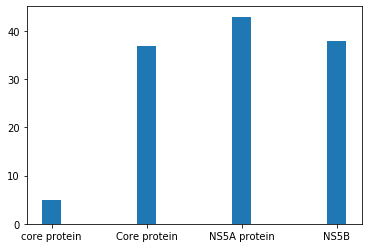

In [37]:
plt.bar(list(d.keys()), d.values(),0.2)

plt.show()

In [33]:
con = dict()
for z in result['country']:
    if z not in con:
        con[z] = 1 
    else:
        con[z] = con[z] + 1
print(con)

{'Netherlands': 48}
